# <center><u><font color='red'> Prédiction des consommations d'énergies</font></u></center>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from functions import utils
import math
from sklearn.svm import SVR
from xgboost import XGBRegressor 
from functions.functions import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
target_col='SiteEnergyUse(kBtu)'

In [3]:
df=pd.read_csv('data/cleaned_and_normalized.csv')


In [4]:
df.head()

,TotalGHGEmissions,NaturalGas(kBtu),SiteEnergyUse(kBtu),ENERGYSTARScore,PropertyGFATotal,NumberofFloors,NumberofBuildings,age,BuildingType_Campus,BuildingType_NonResidential,...,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,90.01,0.998845,3663534.500,0.897972,0.913955,2.214041,-0.044665,-1.309627,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,9.13,-0.797474,1310236.625,0.000000,0.357813,-0.333464,-0.044665,0.893793,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,128.44,1.915530,4456714.500,-0.287828,0.388681,1.577164,-0.044665,-0.595843,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,157.77,2.793199,4145920.500,0.000000,0.879339,0.303412,-0.044665,1.638611,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,215.00,3.897615,6668568.500,-1.517546,0.739028,0.940288,-0.044665,-1.092389,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [5]:
cols=['best_params','R2','rmse','model','time_elapsed']
df_result=pd.DataFrame(columns=cols)
df_result_with_energy_star_score=pd.DataFrame(columns=cols)

In [6]:
test_size=0.25
random_state=42
cv=5
scoring='r2'
feature_cols=[col for col in df.columns.tolist() if col not in ['TotalGHGEmissions','SiteEnergyUse(kBtu)','ENERGYSTARScore']]
feature_cols_with_energy_star_score=[col for col in df.columns.tolist() if col not in ['TotalGHGEmissions','SiteEnergyUse(kBtu)','ENERGYSTARScore']]

In [7]:
X_train,X_test,y_train,y_test=train_test_split(df[feature_cols],df[target_col],test_size=test_size,random_state=random_state)
X_train_with_energy_star_score=X_train[feature_cols_with_energy_star_score]
X_test_with_energy_star_score=X_test[feature_cols_with_energy_star_score]
train_y=y_train.values
test_y=y_test.values


## Partie 1 modèles linéaires

### 1 <u>Modèle linéaire simple</u>

#### 1-1 <u>Régression linéaire sans ENERGYSTARScore </u>

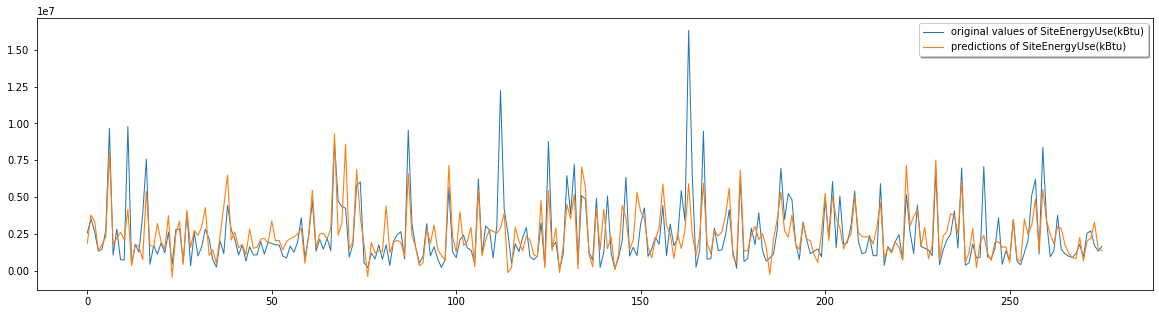

,best_params,R2,rmse,model,time_elapsed
0,None,0.518606,1.543273e+06,LinearRegression,0.029799


In [8]:

train_x=X_train.values
test_x=X_test.values
 

result=utils.linear_regression_func(df,target_col,feature_cols,test_size,random_state,train_x,test_x,train_y,test_y)

df_result=df_result.append(result,ignore_index = True)
df_result

R2 assez élevé de 94%, l'émission de gaz naturel a un effet très significatif sur l'émission de co2

#### 1-2  <u>Régression linéaire avec ENERGYSTARScore </u>

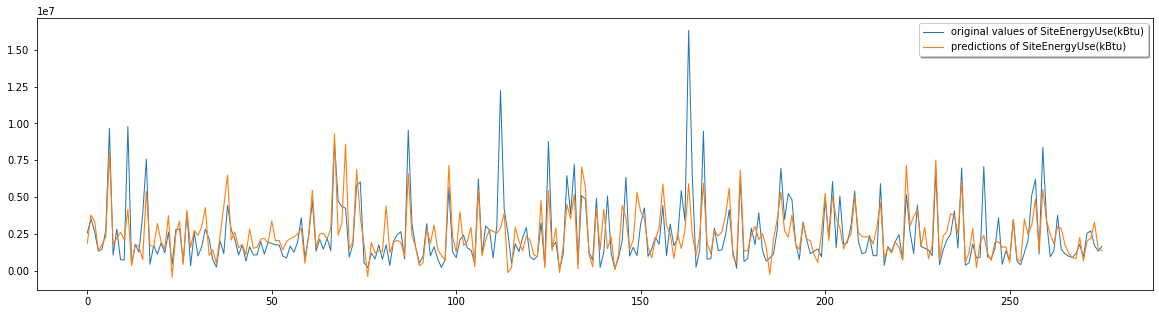

{'best_params': None, 'R2': 0.5186058276057958, 'rmse': 1543272.7931050342, 'model': 'LinearRegression', 'time_elapsed': 0.004641095001716167}


In [9]:

train_x=X_train_with_energy_star_score.values
test_x=X_test_with_energy_star_score.values
 
result=utils.linear_regression_func(df,target_col,feature_cols_with_energy_star_score,test_size,random_state,train_x,test_x,train_y,test_y)

df_result_with_energy_star_score=df_result_with_energy_star_score.append(result,ignore_index = True)
df_result_with_energy_star_score
print(result)

avec un R2 de 93% 

### 2 <u>Régression de ridge</u>

#### 2-1 <u>Régression de ridge sans ENERGYSTARScore </u>

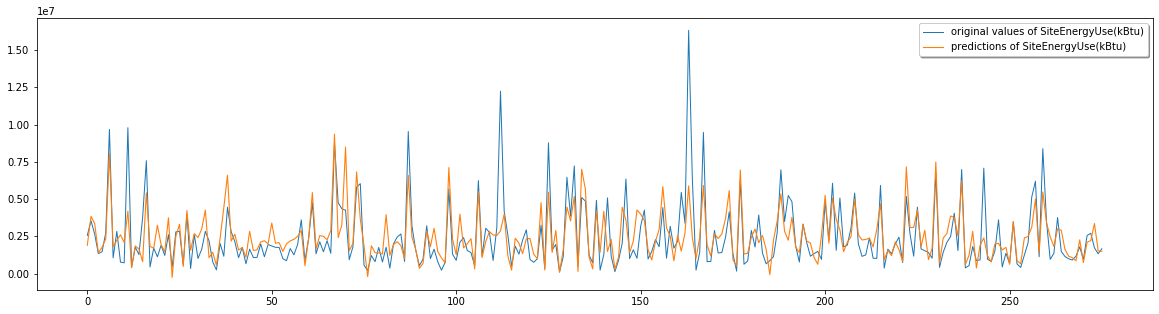

{'best_params': {'alpha': 2.5}, 'R2': 0.5951999212118545, 'rmse': 1514337.8507161695, 'model': 'Ridge', 'time_elapsed': 0.2894418519572355}


In [10]:

train_x=X_train_with_energy_star_score.values
test_x=X_test.values
 
param_grid = [{'alpha' : np.array([10, 9, 8, 7, 6, 5, 4, 3.5, 3, 2.5, 2, 1, 0.95, 0.9, 0.8, 0.7, 0.6, 0.5, 0.1, 0.01])}]


scoring = 'r2'
 
model = Ridge(random_state=random_state)
#ridge.best_params_,ridge.best_score_,rmse,model.__class__.__name__,elapsed
result=utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)

df_result=df_result.append(result,ignore_index = True)
print(result)

#### 2-2 <u>Régression de ridge avec ENERGYSTARScore </u>

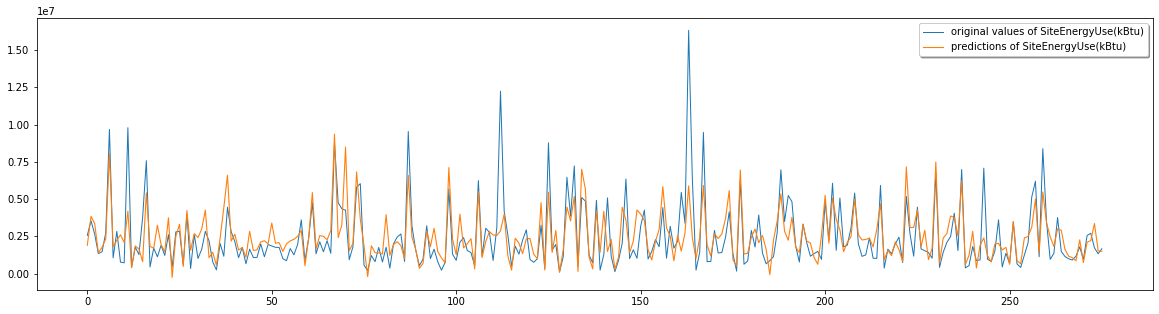

{'best_params': {'alpha': 2.5}, 'R2': 0.5951999212118545, 'rmse': 1514337.8507161695, 'model': 'Ridge', 'time_elapsed': 0.2560941589763388}


,best_params,R2,rmse,model,time_elapsed
0,None,0.518606,1.543273e+06,LinearRegression,0.004641
1,{'alpha': 2.5},0.595200,1.514338e+06,Ridge,0.256094


In [11]:
train_x=X_train_with_energy_star_score.values
test_x=X_test_with_energy_star_score.values

 
param_grid = [{'alpha' : np.array([10, 9, 8, 7, 6, 5, 4, 3.5, 3, 2.5, 2, 1, 0.95, 0.9, 0.8, 0.7, 0.6, 0.5, 0.1, 0.01])}]

 
model = Ridge(random_state=random_state)
result=utils.grid_search_cv_func(df,target_col,feature_cols_with_energy_star_score,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)
df_result_with_energy_star_score=df_result_with_energy_star_score.append(result,ignore_index = True)
print(result)
df_result_with_energy_star_score

### 3 <u>Régression de Lasso</u>

#### 3-1 <u>Régression de Lasso sans ENERGYSTARScore </u>

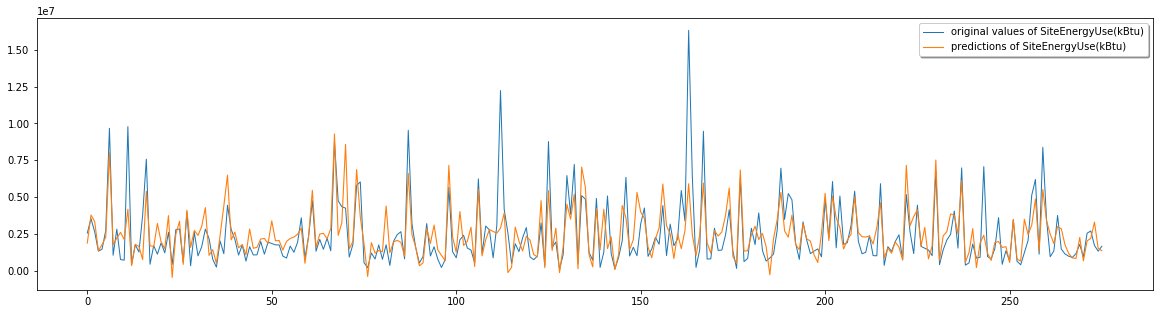

{'best_params': {'alpha': 10.0}, 'R2': 0.5842413853817248, 'rmse': 1542931.5171726607, 'model': 'Lasso', 'time_elapsed': 0.9780506569659337}


,best_params,R2,rmse,model,time_elapsed
0,None,0.518606,1.543273e+06,LinearRegression,0.029799
1,{'alpha': 2.5},0.595200,1.514338e+06,Ridge,0.289442
2,{'alpha': 10.0},0.584241,1.542932e+06,Lasso,0.978051


In [12]:
train_x=X_train.values
test_x=X_test.values

 
param_grid = [{'alpha' : np.array([10, 1, 0.1, 0.02, 0.01, 0.005, 0.001, 0.0005])}]


scoring = 'r2'
 
model = Lasso( random_state=random_state)
result=utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)

df_result=df_result.append(result,ignore_index = True)
print(result)
df_result

#### 3-2 <u>Régression de Lasso avec ENERGYSTARScore </u>

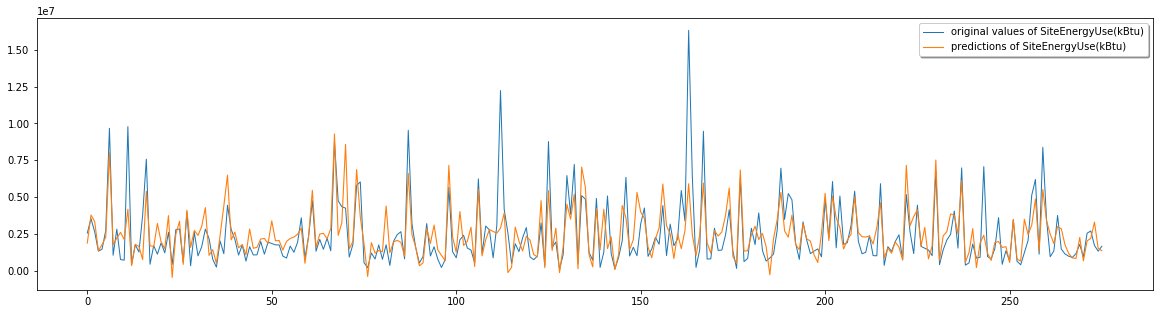

{'best_params': {'alpha': 10.0}, 'R2': 0.5842413853817248, 'rmse': 1542931.5171726607, 'model': 'Lasso', 'time_elapsed': 0.9776016799733043}


,best_params,R2,rmse,model,time_elapsed
0,None,0.518606,1.543273e+06,LinearRegression,0.004641
1,{'alpha': 2.5},0.595200,1.514338e+06,Ridge,0.256094
2,{'alpha': 10.0},0.584241,1.542932e+06,Lasso,0.977602


In [13]:
train_x=X_train_with_energy_star_score.values
test_x=X_test_with_energy_star_score.values

 
param_grid = [{'alpha' : np.array([10, 1, 0.1, 0.02, 0.01, 0.005, 0.001, 0.0005])}]


scoring = 'r2'
 
model = Lasso( random_state=random_state)
result=utils.grid_search_cv_func(df,target_col,feature_cols_with_energy_star_score,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)
df_result_with_energy_star_score=df_result_with_energy_star_score.append(result,ignore_index = True)
print(result)
df_result_with_energy_star_score

### 4 <u>Régression de ElasticNet</u>

#### 4-1 <u>Régression de ElasticNet sans ENERGYSTARScore </u>

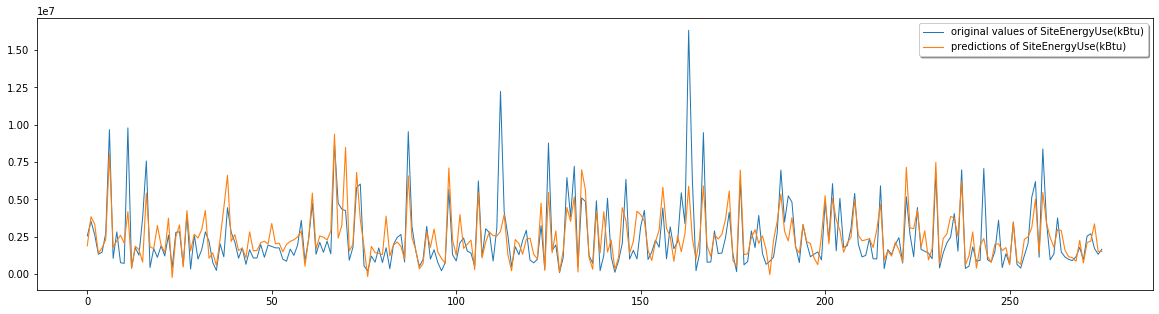

,best_params,R2,rmse,model,time_elapsed
0,None,0.518606,1.543273e+06,LinearRegression,0.029799
1,{'alpha': 2.5},0.595200,1.514338e+06,Ridge,0.289442
2,{'alpha': 10.0},0.584241,1.542932e+06,Lasso,0.978051
3,"{'alpha': 0.01, 'l1_ratio': 0.62}",0.595201,1.512777e+06,ElasticNet,17.023259


In [14]:
train_x=X_train.values
test_x=X_test.values
 
param_grid = [{"alpha": [10, 1, 0.1, 0.01, 0.001],  #coefficient qui multiplie le terme de pénalité
              "l1_ratio": np.arange(0, 2, 0.01)}]#L1 ratio si = 1 équivaut à un Lasso si 0 à un Ridge


 
model = ElasticNet( random_state=random_state,normalize=False)
result=utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)
df_result=df_result.append(result,ignore_index = True)
df_result

#### 4-2 <u>Régression de ElasticNet avec ENERGYSTARScore </u>

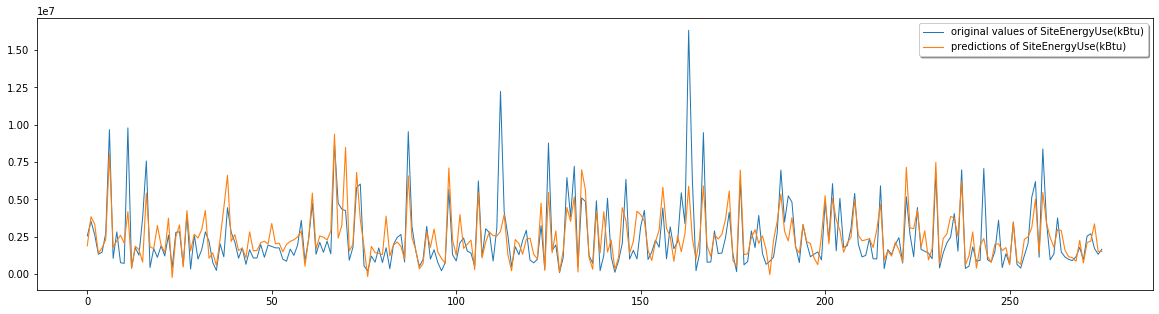

{'best_params': {'alpha': 0.01, 'l1_ratio': 0.62}, 'R2': 0.5952009387689097, 'rmse': 1512776.5168722149, 'model': 'ElasticNet', 'time_elapsed': 16.920569684007205}


,best_params,R2,rmse,model,time_elapsed
0,None,0.518606,1.543273e+06,LinearRegression,0.004641
1,{'alpha': 2.5},0.595200,1.514338e+06,Ridge,0.256094
2,{'alpha': 10.0},0.584241,1.542932e+06,Lasso,0.977602
3,"{'alpha': 0.01, 'l1_ratio': 0.62}",0.595201,1.512777e+06,ElasticNet,16.920570


In [15]:
train_x=X_train_with_energy_star_score.values
test_x=X_test_with_energy_star_score.values

param_grid = [{"alpha": [10, 1, 0.1, 0.01, 0.001],  #coefficient qui multiplie le terme de pénalité
              "l1_ratio": np.arange(0, 2, 0.01)}]#L1 ratio si = 1 équivaut à un Lasso si 0 à un Ridge

 
model = ElasticNet( random_state=random_state,normalize=False)
result=utils.grid_search_cv_func(df,target_col,feature_cols_with_energy_star_score,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)


df_result_with_energy_star_score=df_result_with_energy_star_score.append(result,ignore_index = True)
print(result)
df_result_with_energy_star_score

### 5 <u>SVR support vector linear</u>

#### 5-1 <u>SVR sans ENERGYSTARScore </u>

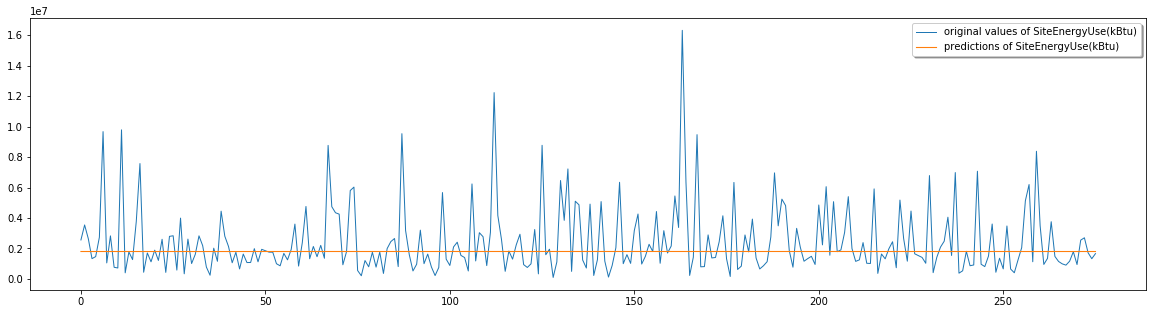

,best_params,R2,rmse,model,time_elapsed
0,None,0.518606,1.543273e+06,LinearRegression,0.029799
1,{'alpha': 2.5},0.595200,1.514338e+06,Ridge,0.289442
2,{'alpha': 10.0},0.584241,1.542932e+06,Lasso,0.978051
3,"{'alpha': 0.01, 'l1_ratio': 0.62}",0.595201,1.512777e+06,ElasticNet,17.023259
4,{'C': 0.99},-0.125229,2.312863e+06,SVR,12.345354


In [16]:
train_x=X_train.values
test_x=X_test.values


param_grid = { 'C' : np.arange(0.01, 1, 0.01)} #Paramètre de régulation : pénalité pour les données mal classées. Si C est grand l'algorithme choisira un hyperplan à marge plus faible si cet hyperplan permet de mieux classer tous les points. 
                                                #Si C est petit, l'algorithme choisira un hyperplan à marge plus importante même si cet hyperplan classe plus mal les points
 
 
model = SVR( kernel = 'linear')
result=utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)


df_result=df_result.append(result,ignore_index = True)
df_result

#### 5-2 <u>SVR avec ENERGYSTARScore </u>

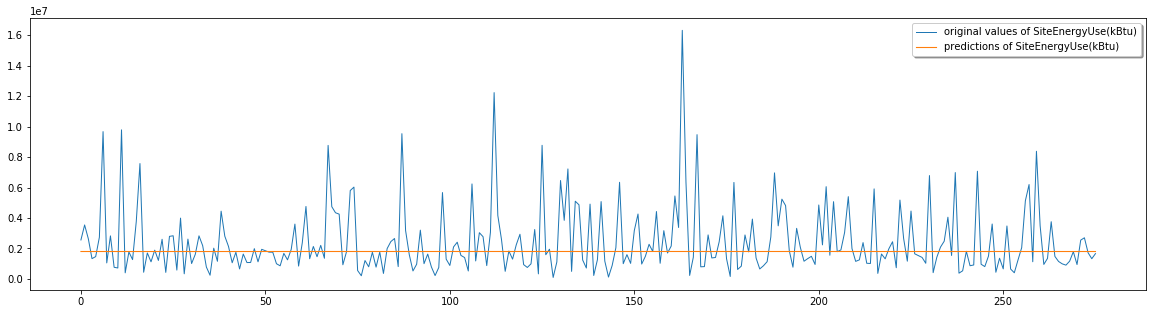

,best_params,R2,rmse,model,time_elapsed
0,None,0.518606,1.543273e+06,LinearRegression,0.004641
1,{'alpha': 2.5},0.595200,1.514338e+06,Ridge,0.256094
2,{'alpha': 10.0},0.584241,1.542932e+06,Lasso,0.977602
3,"{'alpha': 0.01, 'l1_ratio': 0.62}",0.595201,1.512777e+06,ElasticNet,16.920570
4,{'C': 0.99},-0.125229,2.312863e+06,SVR,12.213999


In [17]:
train_x=X_train_with_energy_star_score.values
test_x=X_test_with_energy_star_score.values
 

param_grid = { 'C' : np.arange(0.01, 1, 0.01)} #Paramètre de régulation : pénalité pour les données mal classées. Si C est grand l'algorithme choisira un hyperplan à marge plus faible si cet hyperplan permet de mieux classer tous les points. 
                                                #Si C est petit, l'algorithme choisira un hyperplan à marge plus importante même si cet hyperplan classe plus mal les points

 

 
model = SVR( kernel = 'linear')
result=utils.grid_search_cv_func(df,target_col,feature_cols_with_energy_star_score,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)
df_result_with_energy_star_score=df_result_with_energy_star_score.append(result,ignore_index = True)
df_result_with_energy_star_score

  ### 6 <u>XGBoost</u>

#### 6-1 <u>XGBoost sans ENERGYSTARScore </u>

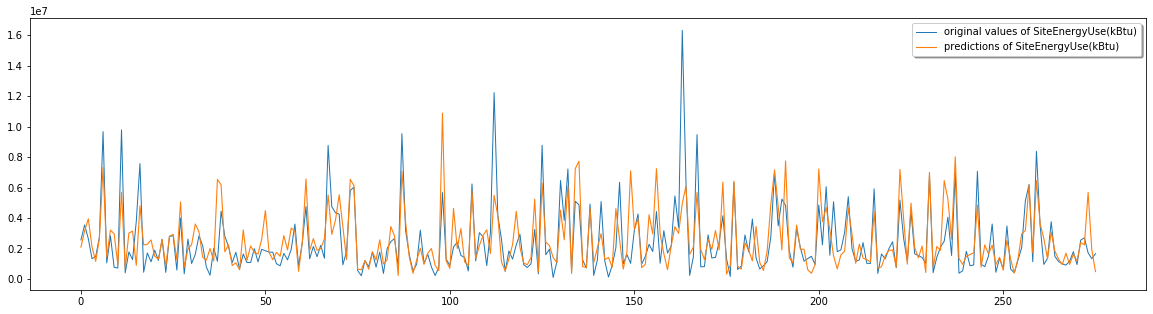

,best_params,R2,rmse,model,time_elapsed
0,None,0.518606,1.543273e+06,LinearRegression,0.029799
1,{'alpha': 2.5},0.595200,1.514338e+06,Ridge,0.289442
2,{'alpha': 10.0},0.584241,1.542932e+06,Lasso,0.978051
3,"{'alpha': 0.01, 'l1_ratio': 0.62}",0.595201,1.512777e+06,ElasticNet,17.023259
4,{'C': 0.99},-0.125229,2.312863e+06,SVR,12.345354
5,"{'max_depth': 20, 'n_estimators': 50}",0.510918,1.579931e+06,XGBRegressor,506.100696


In [18]:
train_x=X_train.values
test_x=X_test.values
 
# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_estimators':  np.arange(50, 300, 20),  #nombre d'arbres de décision #(10,100,10)
              'max_depth': np.arange(20, 50, 5)} #nombre maximum de niveaux dans chaque arbre de décision
 


# define the model/ estimator
model = XGBRegressor(random_state=42)
result=utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)


df_result=df_result.append(result,ignore_index = True)
df_result

#### 6-2 <u>XGBoost avec ENERGYSTARScore </u>

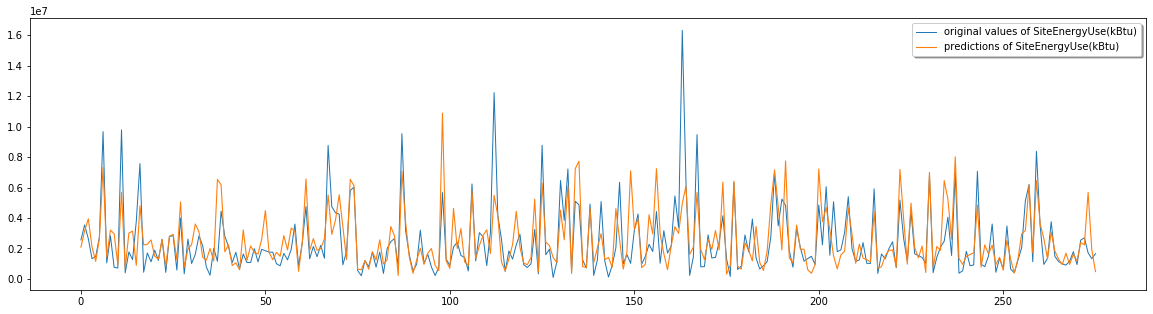

,best_params,R2,rmse,model,time_elapsed
0,None,0.518606,1.543273e+06,LinearRegression,0.004641
1,{'alpha': 2.5},0.595200,1.514338e+06,Ridge,0.256094
2,{'alpha': 10.0},0.584241,1.542932e+06,Lasso,0.977602
3,"{'alpha': 0.01, 'l1_ratio': 0.62}",0.595201,1.512777e+06,ElasticNet,16.920570
4,{'C': 0.99},-0.125229,2.312863e+06,SVR,12.213999
5,"{'max_depth': 20, 'n_estimators': 50}",0.510918,1.579931e+06,XGBRegressor,531.490098


In [19]:
train_x=X_train_with_energy_star_score.values
test_x=X_test_with_energy_star_score.values
 
# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_estimators':  np.arange(50, 300, 20),  #nombre d'arbres de décision #(10,100,10)
              'max_depth': np.arange(20, 50, 5)} #nombre maximum de niveaux dans chaque arbre de décision
scoring = 'r2'


# define the model/ estimator
model = XGBRegressor(random_state=42)
result=utils.grid_search_cv_func(df,target_col,feature_cols_with_energy_star_score,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)
df_result_with_energy_star_score=df_result_with_energy_star_score.append(result,ignore_index = True)
df_result_with_energy_star_score

Conclusion modèles linéaires: La régularisation Ridge avec le pramaètre alpha=1 reste le meilleur modèle, la prise en compte de ENERGYSTARScore comme variable explicative améliore les performance du modèle

## Partie 2 modèles non linéaires

### 1 <u>Random Forest</u>

#### 1-1 <u>Random Forest sans ENERGYSTARScore </u>

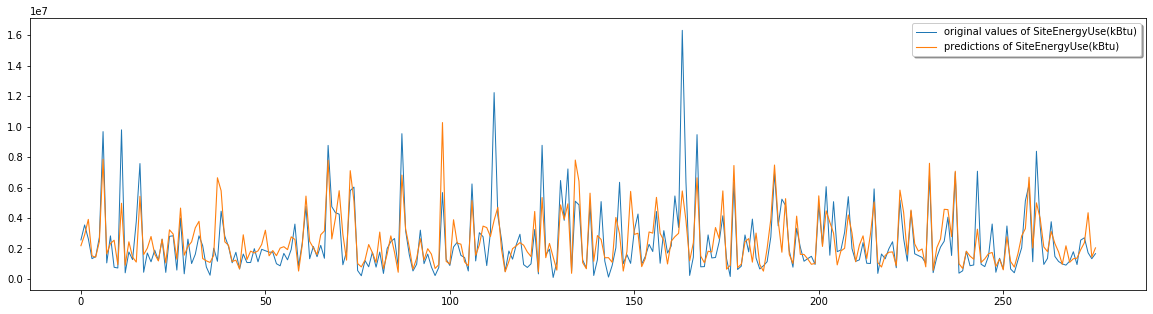

,best_params,R2,rmse,model,time_elapsed
0,None,0.518606,1.543273e+06,LinearRegression,0.029799
1,{'alpha': 2.5},0.595200,1.514338e+06,Ridge,0.289442
2,{'alpha': 10.0},0.584241,1.542932e+06,Lasso,0.978051
3,"{'alpha': 0.01, 'l1_ratio': 0.62}",0.595201,1.512777e+06,ElasticNet,17.023259
4,{'C': 0.99},-0.125229,2.312863e+06,SVR,12.345354
5,"{'max_depth': 20, 'n_estimators': 50}",0.510918,1.579931e+06,XGBRegressor,506.100696
6,"{'n_estimators': 340, 'min_samples_split': 2, ...",0.582811,1.470584e+06,RandomForestRegressor,27.383668


In [20]:
train_x=X_train.values
test_x=X_test.values
 
# valeurs des hyperparamètres à tester
param_grid = {'n_estimators':  np.arange(0, 500, 10),  #nombre d'arbres de décision
              'max_depth': np.arange(0, 50, 1), #nombre maximum de niveaux dans chaque arbre de décision 
              'min_samples_leaf': np.arange(1, 20, 1),   #nombre minimal d'observation pour créer une feuille
              'min_samples_split' : np.arange(1, 20, 1)} #nombre minimal d'observation avant séparation du noeud
 
model = RandomForestRegressor(random_state=random_state)
result=utils.random_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)


df_result=df_result.append(result,ignore_index = True)
df_result

#### 1-2 <u>Random Forest avec ENERGYSTARScore </u>

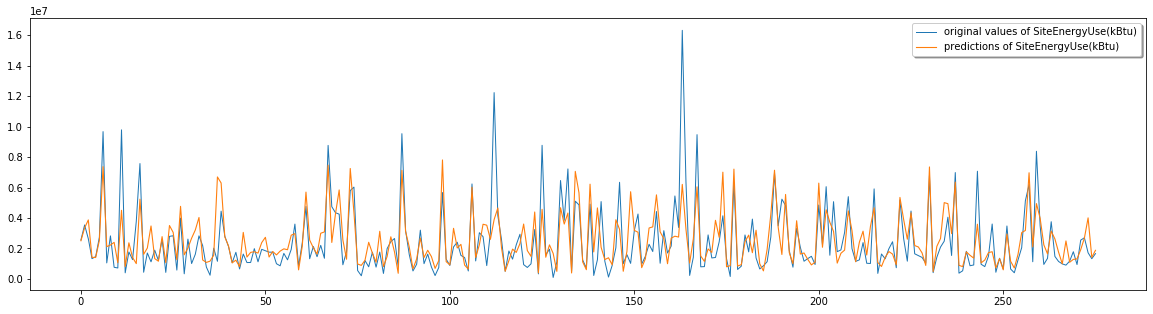

,best_params,R2,rmse,model,time_elapsed
0,None,0.518606,1.543273e+06,LinearRegression,0.004641
1,{'alpha': 2.5},0.595200,1.514338e+06,Ridge,0.256094
2,{'alpha': 10.0},0.584241,1.542932e+06,Lasso,0.977602
3,"{'alpha': 0.01, 'l1_ratio': 0.62}",0.595201,1.512777e+06,ElasticNet,16.920570
4,{'C': 0.99},-0.125229,2.312863e+06,SVR,12.213999
5,"{'max_depth': 20, 'n_estimators': 50}",0.510918,1.579931e+06,XGBRegressor,531.490098
6,"{'n_estimators': 20, 'min_samples_split': 18, ...",0.543417,1.510603e+06,RandomForestRegressor,22.375560


In [21]:
train_x=X_train_with_energy_star_score.values
test_x=X_test_with_energy_star_score.values
 

# valeurs des hyperparamètres à tester
param_grid = {'n_estimators':  np.arange(0, 500, 10),  #nombre d'arbres de décision
              'max_depth': np.arange(0, 50, 1), #nombre maximum de niveaux dans chaque arbre de décision 
              'min_samples_leaf': np.arange(1, 20, 1),   #nombre minimal d'observation pour créer une feuille
              'min_samples_split' : np.arange(1, 20, 1)} #nombre minimal d'observation avant séparation du noeud
 
model = RandomForestRegressor(random_state=random_state)
result=utils.random_search_cv_func(df,target_col,feature_cols_with_energy_star_score,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)
df_result_with_energy_star_score=df_result_with_energy_star_score.append(result,ignore_index = True)
df_result_with_energy_star_score

### 2 <u>SVR NON Linéaire RBF</u>

 #### 2-1 <u>SVR sans ENERGYSTARScore </u>

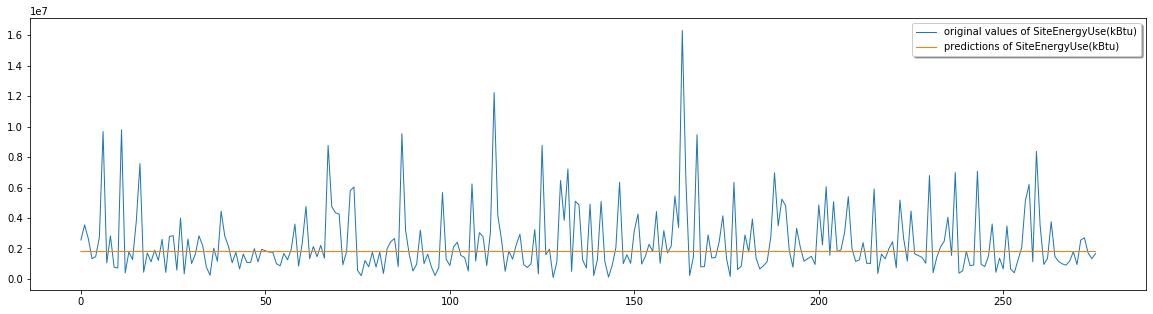

,best_params,R2,rmse,model,time_elapsed
0,None,0.518606,1.543273e+06,LinearRegression,0.029799
1,{'alpha': 2.5},0.595200,1.514338e+06,Ridge,0.289442
2,{'alpha': 10.0},0.584241,1.542932e+06,Lasso,0.978051
3,"{'alpha': 0.01, 'l1_ratio': 0.62}",0.595201,1.512777e+06,ElasticNet,17.023259
4,{'C': 0.99},-0.125229,2.312863e+06,SVR,12.345354
5,"{'max_depth': 20, 'n_estimators': 50}",0.510918,1.579931e+06,XGBRegressor,506.100696
6,"{'n_estimators': 340, 'min_samples_split': 2, ...",0.582811,1.470584e+06,RandomForestRegressor,27.383668
7,"{'C': 95, 'epsilon': 0.01, 'gamma': 0.1}",-0.123276,2.311176e+06,SVR,44.537613


In [22]:
train_x=X_train.values
test_x=X_test.values
 
param_grid = { 
    
              'epsilon' : [0.01, 0.05, 0.1, 1], 
    'C' : np.arange(60, 100, 5), 
        
              'gamma' : [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]}    


 
model = SVR( kernel = 'rbf')
result=utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)


df_result=df_result.append(result,ignore_index = True)
df_result


 #### 2-2 <u>SVR avec ENERGYSTARScore </u>

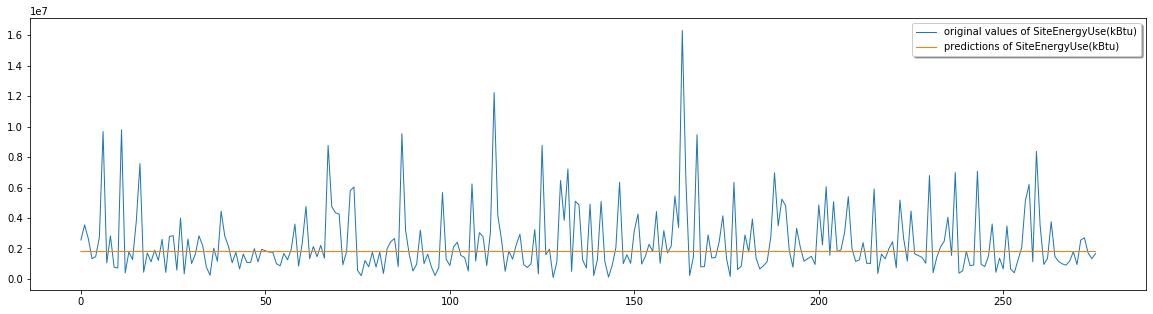

,best_params,R2,rmse,model,time_elapsed
0,None,0.518606,1.543273e+06,LinearRegression,0.004641
1,{'alpha': 2.5},0.595200,1.514338e+06,Ridge,0.256094
2,{'alpha': 10.0},0.584241,1.542932e+06,Lasso,0.977602
3,"{'alpha': 0.01, 'l1_ratio': 0.62}",0.595201,1.512777e+06,ElasticNet,16.920570
4,{'C': 0.99},-0.125229,2.312863e+06,SVR,12.213999
5,"{'max_depth': 20, 'n_estimators': 50}",0.510918,1.579931e+06,XGBRegressor,531.490098
6,"{'n_estimators': 20, 'min_samples_split': 18, ...",0.543417,1.510603e+06,RandomForestRegressor,22.375560
7,"{'C': 95, 'epsilon': 0.01, 'gamma': 0.1}",-0.123276,2.311176e+06,SVR,46.385715


In [23]:
train_x=X_train_with_energy_star_score.values
test_x=X_test_with_energy_star_score.values

param_grid = { 
    
              'epsilon' : [0.01, 0.05, 0.1, 1], 
    'C' : np.arange(60, 100, 5), 
        
              'gamma' : [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]}    


 
model = SVR( kernel = 'rbf')
result=utils.grid_search_cv_func(df,target_col,feature_cols_with_energy_star_score,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)

df_result_with_energy_star_score=df_result_with_energy_star_score.append(result,ignore_index = True)
df_result_with_energy_star_score

In [24]:
df_result_with_energy_star_score.sort_values(by='R2',ascending=False)

,best_params,R2,rmse,model,time_elapsed
3,"{'alpha': 0.01, 'l1_ratio': 0.62}",0.595201,1.512777e+06,ElasticNet,16.920570
1,{'alpha': 2.5},0.595200,1.514338e+06,Ridge,0.256094
2,{'alpha': 10.0},0.584241,1.542932e+06,Lasso,0.977602
6,"{'n_estimators': 20, 'min_samples_split': 18, ...",0.543417,1.510603e+06,RandomForestRegressor,22.375560
0,None,0.518606,1.543273e+06,LinearRegression,0.004641
5,"{'max_depth': 20, 'n_estimators': 50}",0.510918,1.579931e+06,XGBRegressor,531.490098
7,"{'C': 95, 'epsilon': 0.01, 'gamma': 0.1}",-0.123276,2.311176e+06,SVR,46.385715
4,{'C': 0.99},-0.125229,2.312863e+06,SVR,12.213999


In [25]:


df_result.sort_values(by='R2',ascending=False)

,best_params,R2,rmse,model,time_elapsed
3,"{'alpha': 0.01, 'l1_ratio': 0.62}",0.595201,1.512777e+06,ElasticNet,17.023259
1,{'alpha': 2.5},0.595200,1.514338e+06,Ridge,0.289442
2,{'alpha': 10.0},0.584241,1.542932e+06,Lasso,0.978051
6,"{'n_estimators': 340, 'min_samples_split': 2, ...",0.582811,1.470584e+06,RandomForestRegressor,27.383668
0,None,0.518606,1.543273e+06,LinearRegression,0.029799
5,"{'max_depth': 20, 'n_estimators': 50}",0.510918,1.579931e+06,XGBRegressor,506.100696
7,"{'C': 95, 'epsilon': 0.01, 'gamma': 0.1}",-0.123276,2.311176e+06,SVR,44.537613
4,{'C': 0.99},-0.125229,2.312863e+06,SVR,12.345354


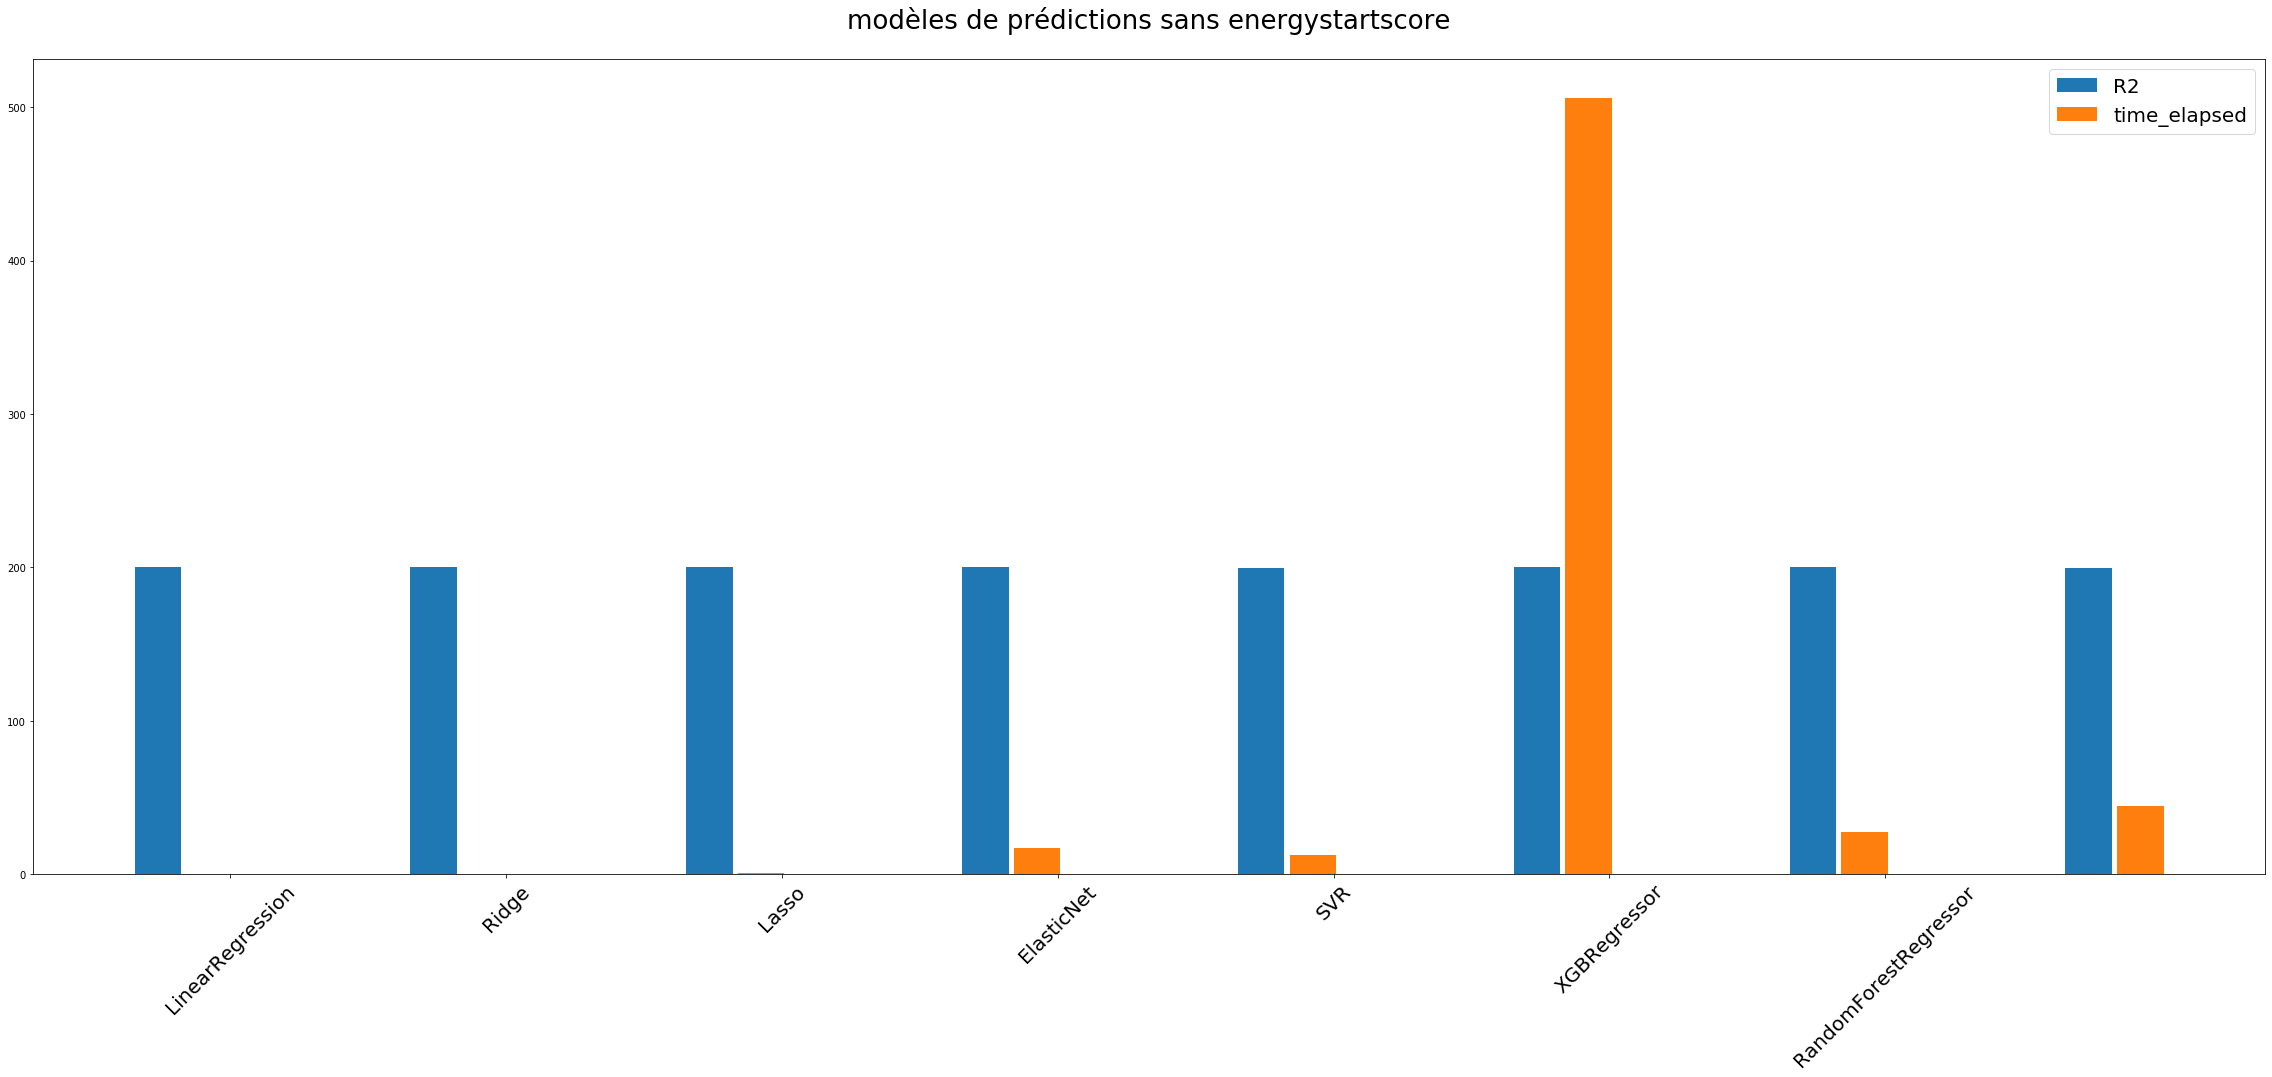

,best_params,R2,rmse,model,time_elapsed
3,"{'alpha': 0.01, 'l1_ratio': 0.62}",0.595201,1.512777e+06,ElasticNet,17.023259
1,{'alpha': 2.5},0.595200,1.514338e+06,Ridge,0.289442
2,{'alpha': 10.0},0.584241,1.542932e+06,Lasso,0.978051
6,"{'n_estimators': 340, 'min_samples_split': 2, ...",0.582811,1.470584e+06,RandomForestRegressor,27.383668
0,None,0.518606,1.543273e+06,LinearRegression,0.029799
5,"{'max_depth': 20, 'n_estimators': 50}",0.510918,1.579931e+06,XGBRegressor,506.100696
7,"{'C': 95, 'epsilon': 0.01, 'gamma': 0.1}",-0.123276,2.311176e+06,SVR,44.537613
4,{'C': 0.99},-0.125229,2.312863e+06,SVR,12.345354


In [31]:
from sklearn.preprocessing import StandardScaler
Labels=df_result['model'].unique().tolist()
 
 
numeric_cols=['R2','rmse','time_elapsed']
fig, ax = plt.subplots(figsize=(40,15))
data_plot=df_result.copy()
data_plot['R2']=data_plot['R2']+200
data_plot['rmse']=data_plot['rmse']+200
 
utils.bar_plot(ax,data_plot[['R2','time_elapsed']], total_width=1.5, single_width=0.9)
plt.xticks(range(len(Labels)), Labels, fontsize=20, rotation=45)

ttl = plt.title("modèles de prédictions sans energystartscore", fontsize=26)
ttl.set_position([.5, 1.03])
plt.show()
df_result.sort_values(ascending=False,by='R2')

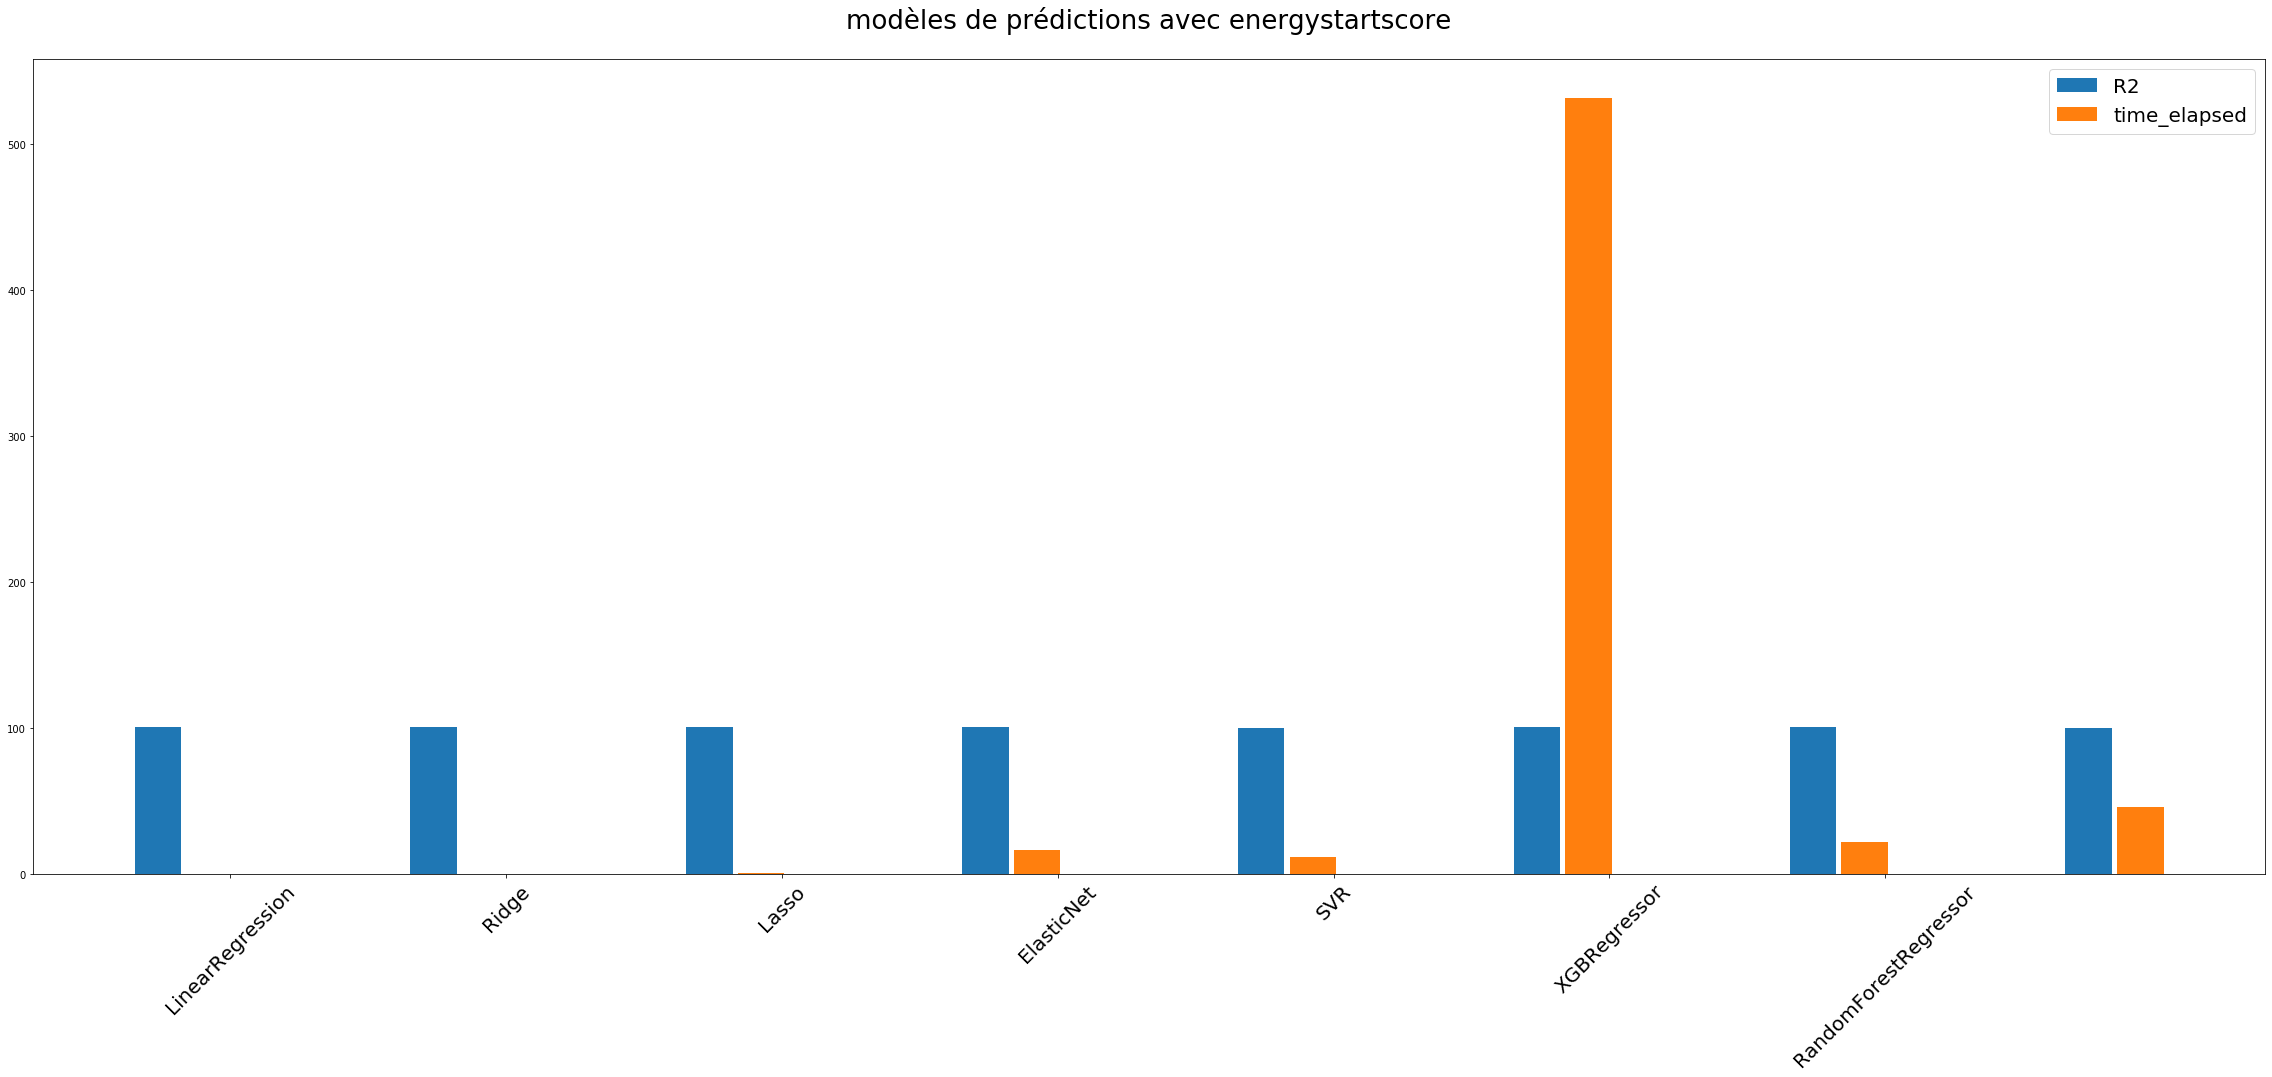

,best_params,R2,rmse,model,time_elapsed
3,"{'alpha': 0.01, 'l1_ratio': 0.62}",0.595201,1.512777e+06,ElasticNet,16.920570
1,{'alpha': 2.5},0.595200,1.514338e+06,Ridge,0.256094
2,{'alpha': 10.0},0.584241,1.542932e+06,Lasso,0.977602
6,"{'n_estimators': 20, 'min_samples_split': 18, ...",0.543417,1.510603e+06,RandomForestRegressor,22.375560
0,None,0.518606,1.543273e+06,LinearRegression,0.004641
5,"{'max_depth': 20, 'n_estimators': 50}",0.510918,1.579931e+06,XGBRegressor,531.490098
7,"{'C': 95, 'epsilon': 0.01, 'gamma': 0.1}",-0.123276,2.311176e+06,SVR,46.385715
4,{'C': 0.99},-0.125229,2.312863e+06,SVR,12.213999


In [30]:
from sklearn.preprocessing import StandardScaler
Labels=df_result_with_energy_star_score['model'].unique().tolist()
 
 
numeric_cols=['R2','rmse','time_elapsed']
fig, ax = plt.subplots(figsize=(40,15))
data_plot=df_result_with_energy_star_score.copy()
#data_plot['R2']=data_plot['R2']+200
data_plot['R2']=data_plot['R2']+100
#data_plot['time_elapsed']
utils.bar_plot(ax,data_plot[['R2','time_elapsed']], total_width=1.5, single_width=0.9)
plt.xticks(range(len(Labels)), Labels, fontsize=20, rotation=45)

ttl = plt.title("modèles de prédictions avec energystartscore", fontsize=26)
ttl.set_position([.5, 1.03])
plt.show()
df_result_with_energy_star_score.sort_values(ascending=False,by='R2')